# Wave data analysis
From the raw data feed, get the following:
 - [f] get frequency data as collection (1/seconds) measure of cycles per second
 - [E] get wave energy data as E (meters squared per second)

Perform the following calculations:
  1. [df] Average of frequency pairs comparing each frequency with the one after it
  2. [Emid] calculate the Energy mid-point
  3. [fmid] calculate the frequency mid-point
  4. [SWF] Significant wave height integrating across the entire range of frequencies (as a function of wave periods)
  5. [p] define the arbitrary period second intervals (p = [0,5,7,9,11,13,15,17,19,21,35])
  6. [pmid] calculate the mid-point (between frequencies) Making plots nicer.
  7. [pf] shift the focus from frequencies to periods
  8. [SWHmid] # integrate the calculations: 4* sqrt(sum(df*Emid))

*PLOT the results*

In [1]:
%matplotlib inline

# the address to the buoy data (should pass in as argument)
# 46053 = E. Santa Barbara
# 46054 = W. Santa Barbara
# 46217 = Anacapa Passage
# 46086 = San Clemente Basin
# 46219 = San Nicolas Island
filename = '46053' # the buoy name
url = 'https://www.ndbc.noaa.gov/data/realtime2/{}.data_spec'.format(filename)
dest = './data/{}.data_spec'.format(filename)
from urllib.request import urlretrieve
urlretrieve(url, dest)


('./data/46053.data_spec', <http.client.HTTPMessage at 0x7f24a00d3b38>)

### Read the file into 3 lists
Skipping the first 3 header lines

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#filename = '46053' # the buoy name
dest = './data/{}.data_spec'.format(filename)

dates = []
energies = []
frequencies = []

with open(dest) as fp:
    for _ in range(3):
        next(fp)
    
    for l in fp:

        dates.append(l.split()[0:5])
        # separation_frequency = l.split()[5] # this value is ignored
        
        # [E] get wave energy data as E (meters squared per second)
        energies.append([float(e) for e in l.split()[6::2]])

        # [f] get frequency data as collection (1/seconds) measure of cycles per second
        freqs=l.split()[7::2]
        frequencies.append([float(i[1:-1]) for i in freqs])

    fp.close()
print("{}\t{}\t{}".format(len(dates), len(energies), len(frequencies)))

1078	1078	1078


### convert the lists to numpy arrays

In [3]:
E = np.array(energies)    # E for 'Energy'
f = np.array(frequencies) # f for 'frequency'

Take a peek at the Energy data:

E (Energy) is a numpy array (1078, 46)


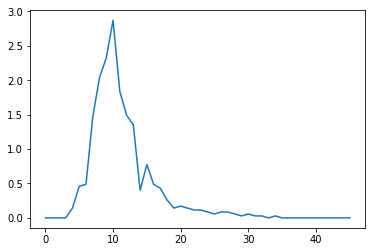

In [4]:
print("E (Energy) is a numpy array {}".format(E.shape))
sample_ndx = 500
plt.plot(E[sample_ndx,:]) # view the data

In [5]:
f[sample_ndx,:]   # display the data

array([0.033, 0.038, 0.043, 0.048, 0.053, 0.058, 0.063, 0.068, 0.073,
       0.078, 0.083, 0.088, 0.093, 0.1  , 0.11 , 0.12 , 0.13 , 0.14 ,
       0.15 , 0.16 , 0.17 , 0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 ,
       0.24 , 0.25 , 0.26 , 0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 ,
       0.33 , 0.34 , 0.35 , 0.365, 0.385, 0.405, 0.425, 0.445, 0.465,
       0.485])

Take a peek at the frequency data:

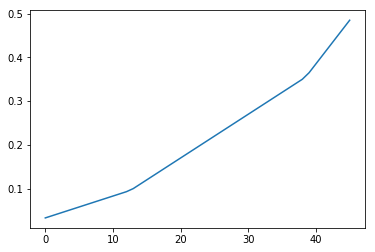

In [6]:
plt.plot(f[sample_ndx,:])

### 1. [df] Average of frequency pairs comparing each frequency with the one after it

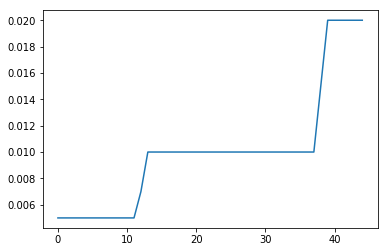

In [7]:
df = np.diff(f)
plt.plot(df[sample_ndx,:])# slice of one row

### 2. [Emid] calculate the Energy mid-point

In [8]:
notfirst = E[:,1:]       # every element in a row, except for the first
notlast  = E[:,:-1]      # every element in a row, except for the last
Emid = .5 * (notlast + notfirst) 
print(Emid.shape)
Emid[sample_ndx]

(1078, 45)


array([0.    , 0.    , 0.    , 0.0715, 0.301 , 0.4735, 0.976 , 1.751 ,
       2.1815, 2.5975, 2.3535, 1.6645, 1.4205, 0.8755, 0.5885, 0.6315,
       0.459 , 0.344 , 0.2005, 0.1575, 0.1575, 0.129 , 0.115 , 0.1005,
       0.0715, 0.0715, 0.086 , 0.0715, 0.043 , 0.043 , 0.043 , 0.029 ,
       0.0145, 0.0145, 0.0145, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    ])

### 3. [fmid] calculate the frequency mid-point

In [9]:
fmid = .5*(f[:,:-1] + f[:,1:]) 
print(fmid.shape)
fmid[sample_ndx]

(1078, 45)


array([0.0355, 0.0405, 0.0455, 0.0505, 0.0555, 0.0605, 0.0655, 0.0705,
       0.0755, 0.0805, 0.0855, 0.0905, 0.0965, 0.105 , 0.115 , 0.125 ,
       0.135 , 0.145 , 0.155 , 0.165 , 0.175 , 0.185 , 0.195 , 0.205 ,
       0.215 , 0.225 , 0.235 , 0.245 , 0.255 , 0.265 , 0.275 , 0.285 ,
       0.295 , 0.305 , 0.315 , 0.325 , 0.335 , 0.345 , 0.3575, 0.375 ,
       0.395 , 0.415 , 0.435 , 0.455 , 0.475 ])

### 4. [SWH]  significant wave height (m -> multiply by 3.28 to get in feet)
integrating across the entire range of frequencies
(the integral)

SWH = 4\*sqrt(sum(df.*Emid,2)); 

.* takes two arrays and returns a 3rd array (of same size) The '2' restricts this to the 2nd dimension

Significant wave height:
 <class 'numpy.ndarray'> (1078,) [0.89583034 0.97037312 0.91953466 ... 0.62175236 0.62970469 0.62792993]


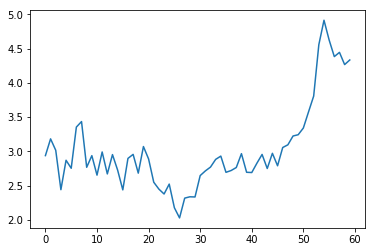

In [10]:
product = (df*Emid)
SWH_total = 4*np.sqrt(product.sum(axis=1)); 

plt.plot(SWH_total[0:60]*3.28)
print("Significant wave height:\n",type(SWH_total), SWH_total.shape, SWH_total)

In [11]:
# test printing different wavelengths
#for i in range(4):
    #plt.plot(i*(SWH_total[-60:]*3.28) + (np.random.randint(-3,2,1)))
    
#print(SWH_total.shape)
#plt.plot(SWHflipped[-60:]*3.28)

### 5. [p] define period second intervals

In [12]:
p = np.array([0,5,11,15,21,35])
p

array([ 0,  5, 11, 15, 21, 35])

### 6. [pmid] calculate the mid-point (between frequencies) 

In [13]:
notfirst = p[1:]       # every element in a row, except for the first
notlast  = p[:-1]      # every element in a row, except for the last
pmid = .5*(notfirst + notlast)
pmid

array([ 2.5,  8. , 13. , 18. , 28. ])

### 7. [pf] shift the focus from frequencies to periods

pf:
 [28.16901408 24.69135802 21.97802198 19.8019802  18.01801802 16.52892562
 15.26717557 14.18439716 13.24503311 12.42236025 11.69590643 11.04972376
 10.3626943   9.52380952  8.69565217  8.          7.40740741  6.89655172
  6.4516129   6.06060606  5.71428571  5.40540541  5.12820513  4.87804878
  4.65116279  4.44444444  4.25531915  4.08163265  3.92156863  3.77358491
  3.63636364  3.50877193  3.38983051  3.27868852  3.17460317  3.07692308
  2.98507463  2.89855072  2.7972028   2.66666667  2.53164557  2.40963855
  2.29885057  2.1978022   2.10526316]


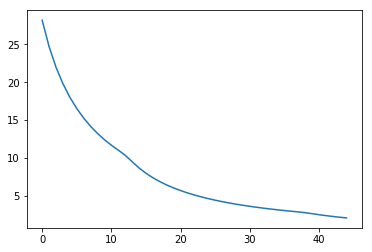

In [14]:
Pf = 1./fmid[0,:]
print("pf:\n",Pf)
plt.plot(Pf)

### 8.[SWHmid] integrate the calculations: 4 sqrt(sum(dfEmid))

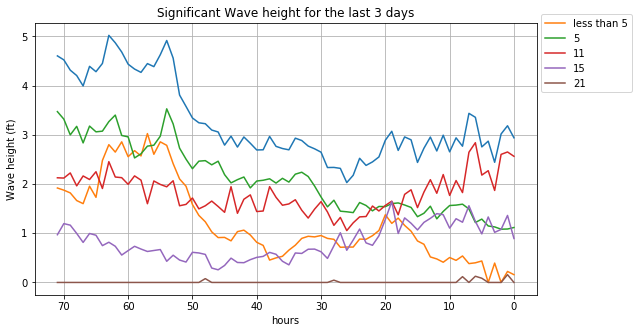

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(9,5)
fig.savefig('SWH.png', dpi=100)

ax.plot(SWH_total[0:72]*3.28)

for idx, _ in enumerate(pmid):
    period_mask = (Pf > p[idx]) & (Pf <= p[idx+1])
    df_subset = df[:,period_mask]
    Emid_subset = Emid[:,period_mask]
    product = (df_subset*Emid_subset)
    SWH = (4*np.sqrt(product.sum(axis=1)))
    if idx == 0:
        label = 'less than 5'
    else:
        label = p[idx]
    ax.plot((SWH[0:72]*3.28),label=label)


plt.gca().invert_xaxis()
ax.set(xlabel='hours', ylabel='Wave height (ft)',
       title='Significant Wave height for the last 3 days')
ax.legend(bbox_to_anchor=(1.2, 1.05))
ax.grid()